# Polar coordinates noise distribution

* The neural activity represents a location on a 2D plane
  * the distance and angle from the nest are encoded as the amplitude and phase of a sinusoid respectively
  * this corresponds to each neuron having a preferred direction, distributed evenly around a circle, and the neuron's activity representing a vector in that preferred direction with a magnitude given by the activity
  * the vector sum of the neurons' preferred direction vectors gives the position of the insect
* Random gaussian noise is added to each neuron's activity
  * this produces a circular Gaussian probability distribution around the position of the insect, because the encoded position of the insect is the vector sum of the preferred direction vectors given by the neural activity

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
plt.style.use('seaborn-notebook')
np.random.seed(7) # seed so plots are repeatable
plt.rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
plt.rc('text', usetex=True)

In [142]:
circ_dist = lambda theta: np.arctan(np.sin(theta) / np.cos(theta))

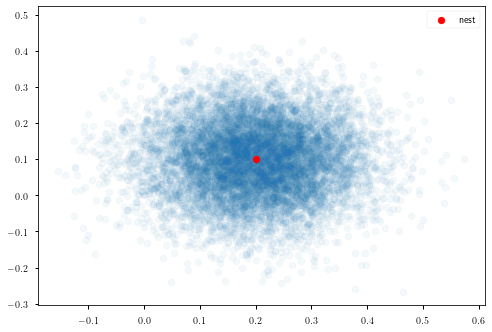

In [143]:
num_points = 10000
mu_x = .2
mu_y = .1
sigma = 0.1

r0 = np.sqrt(mu_x**2 + mu_y**2)
angle0 = np.arctan2(mu_y, mu_x)

points = np.array([mu_x + sigma*np.random.randn(num_points), mu_y + sigma*np.random.randn(num_points)])
r = np.sqrt(np.sum(points**2, axis=0))
angle = np.arctan2(points[1], points[0])

plt.scatter(points[0,:], points[1,:], alpha=0.05)
plt.scatter(mu_x, mu_y, color='red', label='nest')
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.legend()
plt.show()

We start with a 2D circular Gaussian around point $(\mu_x,\mu_y)$ with variance $\sigma^2$

$$p(x,y) = \frac{1}{2\pi\sigma^2} \exp\left({-\frac{(x - \mu_x)^2 + (y - \mu_y)^2}{2\sigma^2}}\right)$$

We want to convert this to polar coordinates $(r,\theta)$ subject to $x = r\cos(\theta)$ and $y = r\sin(\theta)$

$$\begin{aligned}
	p(r,\theta) &= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{(r\cos(\theta) - \mu_x)^2 + (r\sin(\theta) - \mu_y)^2}{2\sigma^2}}\right) \\
	&= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{\cos^2(\theta)(r - \frac{\mu_x}{\cos(\theta)})^2 + \sin^2(\theta)(r - \frac{\mu_y}{\sin(\theta)})^2}{2\sigma^2}}\right) \\
	&= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{\cos^2(\theta)(r - \frac{\mu_x}{\cos(\theta)})^2}{2\sigma^2}}\right) 
		\exp\left({-\frac{\sin^2(\theta)(r - \frac{\mu_y}{\sin(\theta)})^2}{2\sigma^2}}\right)\\
	&= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{(r - \frac{\mu_x}{\cos(\theta)})^2}{2\frac{\sigma^2}{\cos^2(\theta)}}}\right) 
		\exp\left({-\frac{(r - \frac{\mu_y}{\sin(\theta)})^2}{2\frac{\sigma^2}{\sin^2(\theta)}}}\right)\\
\end{aligned}$$

Now we have the product of 2 Gaussians, which must also be a Gaussian with the following mean and standard deviation:

$$\begin{aligned}
	\sigma_r^2 &= \frac{1}{\frac{1}{\left(\frac{\sigma^2}{\cos^2(\theta)}\right)} + \frac{1}{\left(\frac{\sigma^2}{\sin^2(\theta)}\right)}} \\
	&= \frac{1}{\frac{\cos^2(\theta)}{\sigma^2} + \frac{\sin^2(\theta)}{\sigma^2}} \\
	&= \frac{1}{\frac{1}{\sigma^2}} \\
	&= \sigma^2 \\
	\mu_r &= \sigma_r^2 \left(\frac{1}{\frac{\sigma^2}{\cos^2(\theta)}}\frac{\mu_x}{\cos(\theta)} + \frac{1}{\frac{\sigma^2}{\sin^2(\theta)}}\frac{\mu_y}{\sin(\theta)}\right) \\
	&= \sigma^2 \left(\frac{\cos^2(\theta)}{\sigma^2}\frac{\mu_x}{\cos(\theta)} + \frac{\sin^2(\theta)}{\sigma^2}\frac{\mu_y}{\sin(\theta)}\right) \\
	&= \sigma^2 \left(\frac{\cos(\theta)}{\sigma^2}\mu_x + \frac{\sin(\theta)}{\sigma^2}\mu_y \right) \\
	&= \cos(\theta)\mu_x + \sin(\theta)\mu_y \\
\end{aligned}$$

But we need the calculate the normalising constant to express the distribution. We know that our distribution has the form of a Gaussian with $\mu=\cos(\theta)\mu_x + \sin(\theta)\mu_y$ and $\sigma^2$.

$$\begin{aligned}
	\therefore p(r,\theta) &\propto \exp\left(-\frac{(r-(\cos(\theta)\mu_x + \sin(\theta)\mu_y))^2}{2\sigma^2}\right) \\
	&= \exp\left(-\frac{r^2 - 2(\cos(\theta)\mu_x + \sin(\theta)\mu_y)r + (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right) \\
\end{aligned}$$

Expanding the original form of the distribution, we get:

$$\begin{aligned}
	p(r,\theta) &= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{\cos^2(\theta)(r - \frac{\mu_x}{\cos(\theta)})^2 + \sin^2(\theta)(r - \frac{\mu_y}{\sin(\theta)})^2}{2\sigma^2}}\right) \\
	&= \frac{1}{2\pi\sigma^2} \exp\left({-\frac{\cos^2(\theta)(r^2 - 2\frac{\mu_x}{\cos(\theta)}r + \frac{\mu_x^2}{\cos^2(\theta)}) 
		+ \sin^2(\theta)(r^2 - 2\frac{\mu_y}{\sin(\theta)}r + \frac{\mu_y^2}{\sin^2(\theta)})^2}{2\sigma^2}}\right) \\
	&= \frac{1}{2\pi\sigma^2} \exp\left(-\frac{(\cos^2(\theta) + \sin^2(\theta))r^2 - 2(\cos(\theta)\mu_x + \sin(\theta)\mu_y)r + \mu_x^2 + \mu_y^2}{2\sigma^2}\right)\\
	&= \frac{1}{2\pi\sigma^2} \exp\left(-\frac{r^2 - 2(\cos(\theta)\mu_x + \sin(\theta)\mu_y)r + \mu_x^2 + \mu_y^2}{2\sigma^2}\right)\\
\end{aligned}$$

Manipulating this to match the form of the factorised 1D Gaussian with respect to $r$ above:

$$\begin{aligned}
	p(r,\theta) &=\frac{1}{2\pi\sigma^2} \exp\left(-\frac{r^2 - 2(\cos(\theta)\mu_x + \sin(\theta)\mu_y)r + (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right) 
	\exp{\left(-\frac{\mu_x^2 + \mu_y^2 - (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right)}\\
	&= \frac{1}{2\pi\sigma^2}\exp{\left(-\frac{\mu_x^2 + \mu_y^2 - (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right)}\exp\left(-\frac{(r-(\cos(\theta)\mu_x + \sin(\theta)\mu_y))^2}{2\sigma^2}\right)
\end{aligned}$$

The joint distribution can be viewed as a 1D Gaussian distribution over $r$, with a normalising constant that depends on the angle $\theta$. To calculate the marginal distribution for $\theta$ we can integrate over all $r$

$$\begin{aligned}
	p(\theta) &= \int_{-\infty}^\infty p(r,\theta)~dr \\
	&= \frac{1}{2\pi\sigma^2}\exp{\left(-\frac{\mu_x^2 + \mu_y^2 - (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right)} \int_{-\infty}^\infty \exp\left(-\frac{(r-(\cos(\theta)\mu_x + \sin(\theta)\mu_y))^2}{2\sigma^2}\right)~dr
\end{aligned}$$

The general form of the Gaussian integral is:

$$\int_{-\infty}^\infty e^{-a(x+b)^2}~dx = \sqrt{\frac{\pi}{a}}$$

Therefore, the theta distribution is:

$$\begin{aligned}
	p(\theta) &= \frac{1}{2\pi\sigma^2}\exp{\left(-\frac{\mu_x^2 + \mu_y^2 - (\cos(\theta)\mu_x + \sin(\theta)\mu_y)^2}{2\sigma^2}\right)} \sqrt{2\pi\sigma^2} \\
	&= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{\mu_x^2 + \mu_y^2 - \cos^2(\theta)\mu_x^2 + \cos(\theta)\sin(\theta)\mu_x\mu_y - \sin^2(\theta)\mu_y^2}{2\sigma^2}\right)} \\
	&= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{(1 - \cos^2(\theta))\mu_x^2 + (1 - \sin^2(\theta))\mu_y^2 + \cos(\theta)\sin(\theta)\mu_x\mu_y}{2\sigma^2}\right)} \\
	&= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{\sin^2(\theta)\mu_x^2 + \cos^2(\theta)\mu_y^2 + \cos(\theta)\sin(\theta)\mu_x\mu_y}{2\sigma^2}\right)} \\
	&= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{(\sin(\theta)\mu_x - \cos(\theta)\mu_y)^2}{2\sigma^2}\right)} \\
\end{aligned}$$

We can change this 

$$\begin{aligned}
	(\sin(\theta)\mu_x - \cos(\theta)\mu_y)^2 &= \sin^2(\theta)\mu_x^2 - 2\sin(\theta)\cos(\theta)\mu_x\mu_y + \cos^2(\theta)\mu_y^2
\end{aligned}$$

...
This happens to be equal to the following:

$$\begin{aligned}
	p(\theta) &= \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(r_0\sin(\theta - \theta_0))^2}{2\sigma^2}\right) \\
\end{aligned}$$

To check that the normalising constant works we can integrate over it:

**Hang on, this isn't true... can't integrate of the exponential of a squared sinusoid...**

$$\begin{aligned}
	\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(r_0\sin(\theta - \theta_0))^2}{2\sigma^2}\right)~d\theta &= 
	\frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^\infty \exp\left(-\frac{r_0^2(\sin(\theta - \frac{\theta_0}{r_0}))^2}{2\sigma^2}\right)~d\theta \\
	&= \frac{1}{\sqrt{2\pi\sigma^2}} \sqrt{\frac{2 \pi \sigma^2}{r_0^2}} \\
	&= \frac{1}{r_0} \\
\end{aligned}$$

Therefore we need to scale the normalising constant by a factor of $r_0$ to make $p(\theta)$ integrate to 1

$$\therefore p(\theta) = \frac{r_0}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\sin^2(\theta - \theta_0}{2\frac{\sigma^2}{r_0^2}}\right)$$

In [161]:
x_y_to_r_theta = lambda x, y: (np.sqrt(x**2+y**2),np.arctan2(y,x))
prob_xy = lambda x, y: 1/(2*np.pi*sigma**2) * np.exp(-((x - mu_x)**2 + (y - mu_y)**2)/(2*sigma**2))
prob_r_theta = lambda r, theta: 1/(2*np.pi*sigma**2) * np.exp(-(r**2 - 2*(np.cos(theta)*mu_x + np.sin(theta)*mu_y)*r + mu_x**2+mu_y**2)/(2*sigma**2))
prob_theta = lambda theta: r0/np.sqrt(2*np.pi*sigma**2) * np.exp(- np.sin(theta-angle0)**2 / (2*sigma**2/r0**2))

Check that $p(x,y)$ and $p(r,\theta)$ match the empirical distribution (dot scattering)

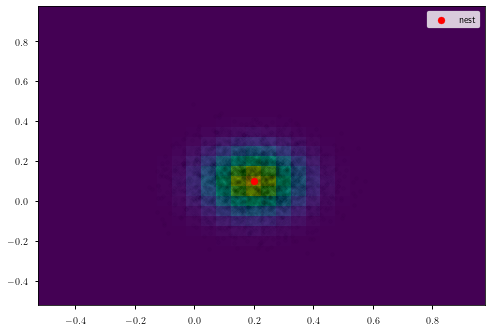

X-Y and R-Theta distributions match? True


In [157]:
x,y = np.meshgrid(np.arange(-0.5,1,0.05),np.arange(-0.5,1,0.05))

plt.pcolor(x, y, prob_r_theta(*x_y_to_r_theta(x,y)))
plt.scatter(points[0,:], points[1,:], marker='.', color='black', alpha=0.02)
plt.scatter(mu_x, mu_y, color='red', label='nest')
plt.legend()
plt.show()

print(f'X-Y and R-Theta distributions match? {np.allclose(prob_xy(x,y), prob_r_theta(*x_y_to_r_theta(x,y)))}')

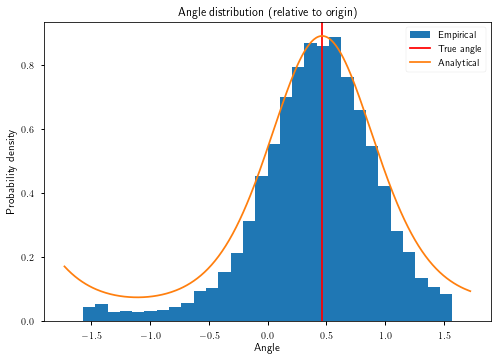

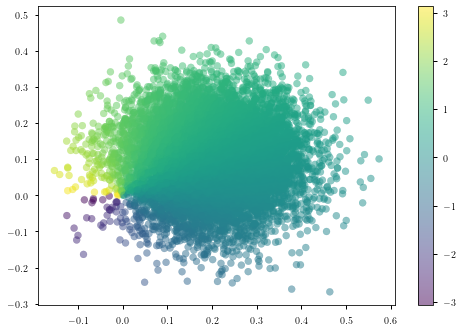

In [162]:
plt.hist(np.arctan(points[1]/points[0]), 30, density=True, label='Empirical')
theta = np.arange(*plt.xlim(),0.01)

plt.axvline(angle0, color='red', label='True angle')
plt.plot(theta, prob_theta(theta), label='Analytical')
plt.title('Angle distribution (relative to origin)')
plt.xlabel('Angle')
plt.ylabel('Probability density')
plt.legend()
plt.show()

plt.scatter(points[0], points[1], c=angle, alpha=0.5)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
# plt.title('Scatter plot of points with distances greater than (yellow) or less than (purple) the true distance')
plt.colorbar()
plt.show()


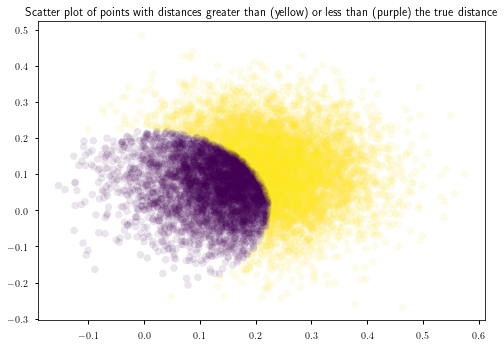

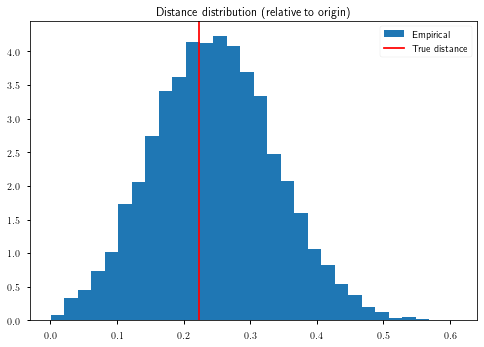

In [147]:
plt.scatter(points[0], points[1], c=r>=r0, alpha=0.1)
plt.xlim([min(-0.1,plt.xlim()[0]),plt.xlim()[1]])
plt.title('Scatter plot of points with distances greater than (yellow) or less than (purple) the true distance')
plt.show()

plt.hist(r, 30, density=True, label='Empirical')
plt.axvline(r0, color='red', label='True distance')
plt.title('Distance distribution (relative to origin)')
plt.legend()
plt.show()

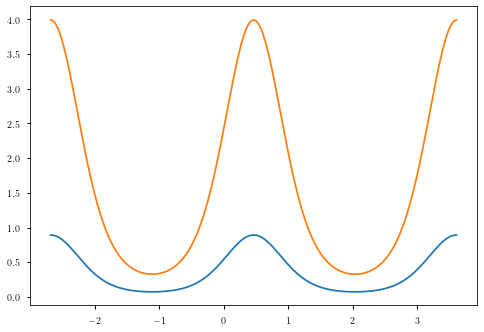

In [148]:
plt.plot(t:= np.arange(angle0 - np.pi,angle0 + np.pi,0.001), prob_theta2(t))
plt.plot(t:= np.arange(angle0 - np.pi,angle0 + np.pi,0.001), 1/np.sqrt(2*np.pi*sigma**2) *np.exp(-np.sin(t-angle0)**2 / (2*sigma**2/r0**2)))

In [149]:
# this isn't a probability distribution because we don't normalise based on r0...